In [2]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

x = iris.iloc[:, :4].values  # 독립변수
y = iris.iloc[:, 4].values
print(y[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


In [4]:
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
print(y1[:5])

[0 0 0 0 0]


In [5]:
y2 = pd.get_dummies(y1).values #
print(y2[:5])

[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


In [15]:
from sklearn.model_selection import train_test_split

x_tr, x_ts, y_tr, y_ts = train_test_split(x, y2, test_size=0.2, stratify=y, random_state = 10)

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# model 생성
model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
sgd = SGD(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


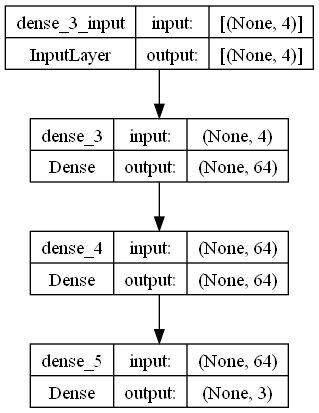

In [16]:
from keras.utils import plot_model  
plot_model(model,show_shapes=True)

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
es = EarlyStopping(monitor='val_loss', patience=10)

# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("iris_best.h5", save_best_only=True)

# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5) #기존 학습률*factor (배수)

# 학습 과정의 주요 history를 csv로 저장
csvlogger = CSVLogger("mylog.csv")  
hist = model.fit(x_tr, y_tr, validation_split=0.2, epochs=100, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/100
3/3 [==============================] - 1s 113ms/step - loss: 0.9950 - accuracy: 0.6250 - val_loss: 0.8633 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 0.9290 - accuracy: 0.6250 - val_loss: 0.8368 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 0.8795 - accuracy: 0.6250 - val_loss: 0.8112 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 0.8413 - accuracy: 0.6250 - val_loss: 0.7866 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.8168 - accuracy: 0.7188 - val_loss: 0.7609 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - loss: 0.7945 - accuracy: 0.6667 - val_loss: 0.7398 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 0.7757 - 

In [18]:
from keras.models import load_model
model = load_model('iris_best.h5')
model.evaluate(x_ts, y_ts, verbose=0)


[0.2837070822715759, 0.9666666388511658]

In [19]:
# 모델 평가
loss, accuracy = model.evaluate(x_ts, y_ts, verbose=0)
print('정확도 = {:.2f}'.format(accuracy))

정확도 = 0.97


In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
pred = model.predict(x_ts)
print(pred[:10])
y_ts_class = np.argmax(y_ts, axis=1)
pred_class = np.argmax(pred, axis=1)

print(y_ts_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_ts_class, pred_class))

1/1 [==============================] - 0s 59ms/step
[[1.4368169e-02 5.6201082e-01 4.2362109e-01]
 [9.2931134e-01 6.8723604e-02 1.9650727e-03]
 [1.2213951e-02 4.7942767e-01 5.0835836e-01]
 [7.0419097e-03 4.6106890e-01 5.3188920e-01]
 [7.4640974e-02 7.2729242e-01 1.9806656e-01]
 [3.0749713e-03 3.2912481e-01 6.6780019e-01]
 [9.1772091e-01 7.8923866e-02 3.3552335e-03]
 [1.9139640e-03 2.2426705e-01 7.7381897e-01]
 [2.0961617e-03 2.5061589e-01 7.4728799e-01]
 [9.7854978e-01 2.1170374e-02 2.7985548e-04]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 2 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [21]:
model.save('iris.h5')

In [22]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('./iris_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\tjoeun\AppData\Local\Temp\tmpod2m6ewl\assets


INFO:tensorflow:Assets written to: C:\Users\tjoeun\AppData\Local\Temp\tmpod2m6ewl\assets
